# 详细说明 `sns.displot()`

`seaborn.displot()` 是 Seaborn 库中一个非常强大的函数，用于可视化单变量或双变量的分布。它提供了多种分布可视化选项，并支持分面（faceting）来创建多个子图。下面我将从多个方面详细说明这个函数。

## 1. 基本功能

`displot()` 是一个图形级别的函数（返回一个 FacetGrid 对象），它可以创建以下几种类型的分布图：

- 直方图（histogram）
- 核密度估计图（Kernel Density Estimate, KDE）
- 经验累积分布函数图（ECDF）
- 直方图与KDE的组合

## 2. 主要参数

### 基本参数

| 参数 | 说明 |
|------|------|
| `data` | 输入的数据集（DataFrame 或数组） |
| `x`, `y` | 指定要绘制的变量（单变量或双变量） |
| `hue` | 用于分组的分类变量，用不同颜色表示 |
| `row`, `col` | 用于分面的变量，创建多行或多列的子图 |
| `col_wrap` | 每行显示的子图数量 |
| `kind` | 指定图形类型：'hist', 'kde', 'ecdf' 或 None（自动选择） |

### 样式参数

| 参数 | 说明 |
|------|------|
| `bins` | 直方图的箱数 |
| `kde` | 是否添加KDE曲线（True/False） |
| `rug` | 是否添加地毯图（True/False） |
| `color` | 指定颜色 |
| `palette` | 指定调色板 |
| `height`, `aspect` | 控制图形大小 |

### 统计参数

| 参数 | 说明 |
|------|------|
| `stat` | 统计方式：'count', 'frequency', 'density', 'probability' |
| `cumulative` | 是否显示累积分布（True/False） |
| `common_bins` | 多个直方图是否使用相同的箱（True/False） |
| `common_norm` | 多个KDE是否使用相同的归一化（True/False） |

## 3. 使用示例

### 示例1：基本直方图

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.displot(data=tips, x="total_bill")
plt.show()
```

### 示例2：添加KDE曲线

```python
sns.displot(data=tips, x="total_bill", kde=True)
plt.show()
```

### 示例3：分组直方图

```python
sns.displot(data=tips, x="total_bill", hue="sex", multiple="stack")
plt.show()
```

### 示例4：双变量分布

```python
sns.displot(data=tips, x="total_bill", y="tip", kind="kde")
plt.show()
```

### 示例5：分面网格

```python
sns.displot(data=tips, x="total_bill", col="time", row="smoker", kind="hist")
plt.show()
```

### 示例6：ECDF图

```python
sns.displot(data=tips, x="total_bill", kind="ecdf")
plt.show()
```

## 4. 高级用法

### 4.1 对数刻度

```python
sns.displot(data=tips, x="total_bill", log_scale=True)
plt.show()
```

### 4.2 自定义分箱

```python
sns.displot(data=tips, x="total_bill", bins=30, binrange=(0, 60))
plt.show()
```

### 4.3 条件分布

```python
sns.displot(
    data=tips, x="total_bill", hue="day",
    col="time", kind="kde", height=4, aspect=.7
)
plt.show()
```

## 5. 与类似函数的比较

| 函数 | 特点 |
|------|------|
| `displot()` | 图形级函数，最灵活，支持分面 |
| `histplot()` | 坐标轴级函数，更专注于直方图 |
| `kdeplot()` | 坐标轴级函数，更专注于KDE |
| `ecdfplot()` | 坐标轴级函数，更专注于ECDF |

## 6. 注意事项

1. `displot()` 返回的是 FacetGrid 对象，可以进一步自定义
2. 对于大数据集，KDE 计算可能会较慢
3. 分面时，`col_wrap` 参数可以控制每行的子图数量
4. 可以使用 `height` 和 `aspect` 参数控制图形大小比例

## 7. 实际应用案例

### 分析钻石数据集

```python
diamonds = sns.load_dataset("diamonds")

# 价格分布，按切工分组
sns.displot(
    data=diamonds, x="price", hue="cut",
    kind="kde", height=6, aspect=1.2,
    palette="ch:rot=-.25,hue=1,light=.75"
)
plt.title("钻石价格分布（按切工分组）")
plt.show()
```

### 多变量分析

```python
sns.displot(
    data=diamonds, x="price", y="carat",
    hue="cut", kind="kde", height=7,
    aspect=1, palette="light:b"
)
plt.title("钻石价格与克拉重量的联合分布")
plt.show()
```

`displot()` 的强大之处在于它能够通过简单的参数组合，创建出复杂的分布可视化图形，非常适合数据探索阶段使用。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 示例1

In [4]:
#导数数据集'titanic'
titanic = pd.read_csv("seaborn-data/titanic.csv")
#查看数据集的随机10行数据，用sample方法
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
619,0,2,male,26.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
120,0,2,male,21.00,2,0,73.5000,S,Second,man,True,NaN,Southampton,no,False
866,1,2,female,27.00,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
515,0,1,male,47.00,0,0,34.0208,S,First,man,True,D,Southampton,no,True
363,0,3,male,35.00,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
289,1,3,female,22.00,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
671,0,1,male,31.00,1,0,52.0000,S,First,man,True,B,Southampton,no,False
781,1,1,female,17.00,1,0,57.0000,S,First,woman,False,B,Southampton,yes,False
678,0,3,female,43.00,1,6,46.9000,S,Third,woman,False,NaN,Southampton,no,False


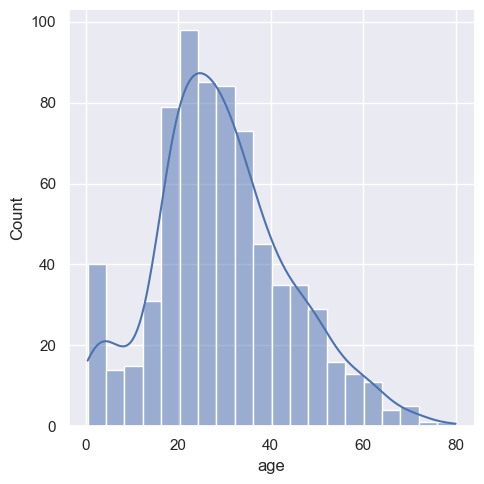

In [ ]:
sns.displot(titanic,x='age',
            kde=True    # 'kde' 是控制密度估计曲线的参数，如果我们将其设为 False，则不显示密度曲线。
           )

## 示例2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
33,Adelie,Dream,40.9,18.9,184.0,3900.0,MALE
269,Gentoo,Biscoe,45.2,15.8,215.0,5300.0,MALE
89,Adelie,Dream,38.9,18.8,190.0,3600.0,FEMALE
132,Adelie,Dream,36.8,18.5,193.0,3500.0,FEMALE
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
250,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,MALE
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,FEMALE


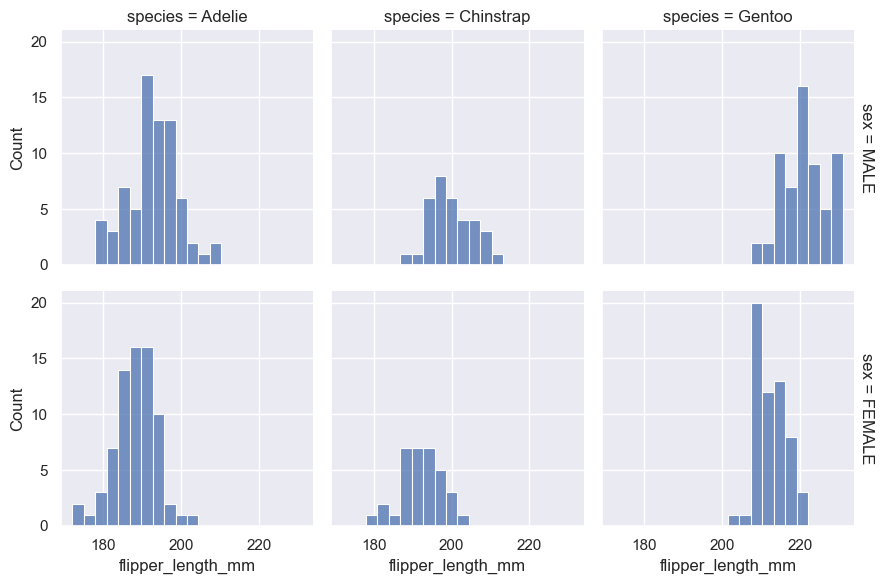

In [2]:
sns.set_theme(style="darkgrid")
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

sns.displot(
    penguins, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)



这段代码使用了 Python 的 seaborn 库（通常导入为 sns）来创建一个分布图（distribution plot），展示钻石数据集中价格（price）与颜色（color）之间的关系，并按钻石的净度（clarity）分面显示。

,carat,cut,color,clarity,depth,table,price,x,y,z
19562,1.04,Very Good,D,VS1,62.3,59.0,8192,6.39,6.48,4.01
48001,0.52,Ideal,D,VS2,61.3,56.0,1919,5.20,5.15,3.17
41794,0.52,Premium,G,SI1,60.6,61.0,1249,5.19,5.17,3.14
5866,1.01,Premium,G,SI2,63.0,59.0,3923,6.38,6.32,4.00
46978,0.23,Very Good,F,VVS2,59.7,58.0,530,4.02,4.06,2.41
37508,0.36,Ideal,G,IF,61.5,56.0,985,4.59,4.62,2.83
30745,0.36,Good,D,VS2,63.4,54.0,739,4.51,4.57,2.88
20486,1.50,Premium,G,SI2,60.1,59.0,8820,7.38,7.36,4.43
43041,0.50,Very Good,E,SI1,63.5,61.0,1374,5.03,4.98,3.18
18509,0.92,Very Good,D,VS1,61.9,58.0,7544,6.19,6.24,3.85


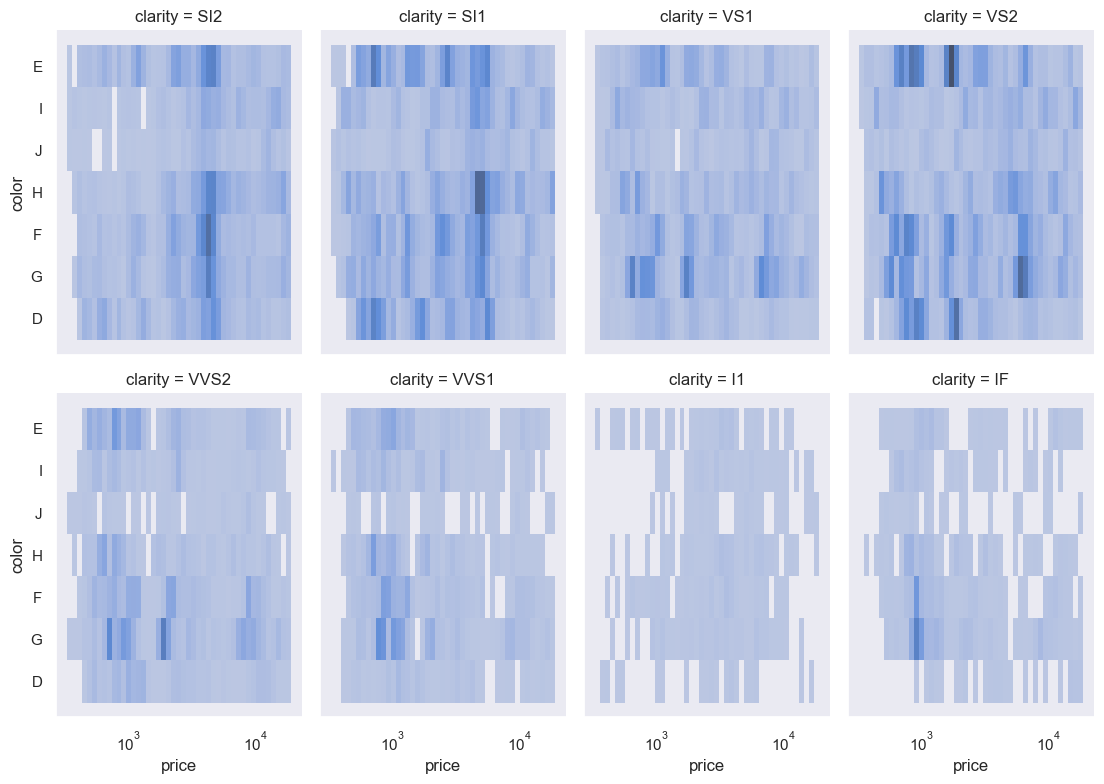

In [ ]:
sns.set_theme(style="dark")
diamonds = pd.read_csv("seaborn-data/diamonds.csv")
display(diamonds.sample(10))

# 如果没有明确指定 kind 参数，displot 默认会根据输入数据自动选择分布类型（例如，如果 y 是分类变量，可能会生成“堆积直方图”或“热力图”）。
sns.displot(
    data=diamonds,
    x="price",
    y="color",      # 将 color 列作为 y 轴变量。这里 color 是分类变量（如 D、E、F 等表示钻石颜色等级），因此会生成类似“热力图”的分布。
    col="clarity",  # 按 clarity（净度）分面（FacetGrid），即每个子图显示不同净度的数据。
    log_scale=(True, False),    # x 轴（price）使用对数刻度（因为价格分布通常右偏，对数刻度可以更好地展示细节）。
                                # y 轴（color）保持线性刻度（因为是分类变量）。
    col_wrap=4,     # 每行最多显示 4 个子图，超出的子图会自动换行。
    height=4, aspect=.7,
)

这段代码使用 seaborn 库（通常缩写为 sns）绘制了一个条件分布的核密度估计图（KDE），展示了钻石数据集中 carat（克拉重量）的分布如何随 cut（切工质量）的不同而变化。

,carat,cut,color,clarity,depth,table,price,x,y,z
38675,0.52,Very Good,I,SI1,60.3,61.0,1041,5.14,5.20,3.12
50963,0.61,Ideal,E,VS1,62.1,57.0,2324,5.41,5.47,3.38
47408,0.50,Ideal,F,VVS2,62.3,57.0,1850,5.06,5.08,3.16
17760,1.22,Very Good,H,VS1,58.9,59.0,7152,6.96,7.02,4.12
30237,0.33,Ideal,E,VS2,61.1,56.0,723,4.45,4.48,2.73
2255,0.72,Ideal,F,VS2,61.3,56.0,3151,5.78,5.80,3.55
29743,0.32,Ideal,H,VVS1,61.3,56.0,708,4.41,4.43,2.71
14958,1.21,Ideal,H,SI1,62.6,53.0,6025,6.87,6.80,4.28
38296,0.30,Ideal,G,SI1,61.8,56.0,487,4.31,4.34,2.67
32396,0.31,Ideal,E,VVS2,61.3,55.0,791,4.35,4.39,2.68


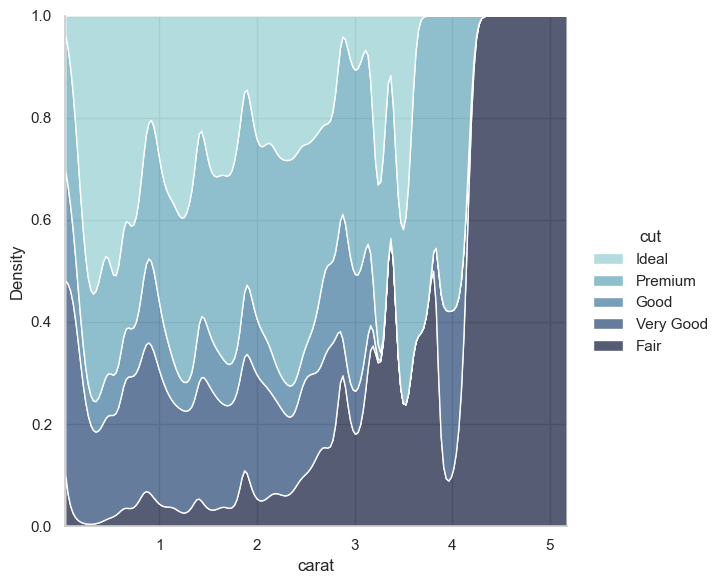

In [ ]:
sns.set_theme(style="whitegrid")
# seaborn 内置的 diamonds 数据集，包含钻石的克拉重量（carat）、切工（cut）、颜色（color）、净度（clarity）等字段。
diamonds = pd.read_csv("seaborn-data/diamonds.csv")
display(diamonds.sample(10))

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat",
    hue="cut",  # 根据 cut 列（钻石切工）分组，并用不同颜色区分。
    kind="kde", # 绘制核密度估计图（Kernel Density Estimation），显示概率密度分布。
    height=6,
    # 将不同组（cut）的 KDE 曲线在纵轴方向堆叠并归一化，总高度为 1。
    # 每个点的纵坐标表示该 carat 值下，不同 cut 的占比（概率）。
    multiple="fill",
    clip=(0, None), # 限制 KDE 的评估范围为 carat >= 0（避免负值的无效计算）
    palette="ch:rot=-.25,hue=1,light=.75",
)

### 图形解读
- **横轴**：钻石的克拉重量（`carat`）。
- **纵轴**：归一化的密度值，表示在某个 `carat` 值下，不同 `cut` 类别的相对比例。
- **颜色**：不同颜色的区域代表不同的切工等级（如 Ideal、Premium、Good 等）。
- **用途**：观察不同切工等级的钻石在克拉重量上的分布差异。例如：
  - 小克拉（<1）的钻石中，高切工等级（如 Ideal）占比可能更高。
  - 大克拉（>2）的钻石中，低切工等级的占比可能增加。

### 补充说明
- **KDE 原理**：核密度估计是一种非参数方法，通过平滑的曲线近似数据的概率分布。
- **`multiple="fill"` 的替代选项**：
  - `"layer"`：直接叠加多条 KDE 曲线。
  - `"stack"`：堆叠但不归一化（纵轴为密度累加值）。
- **调色板**：`palette` 参数支持多种预设（如 `"viridis"`、`"pastel"`）或自定义格式（如本例）。

### 效果示意图（文字描述）
图形会显示多条堆叠的彩色 KDE 区域，从下到上按 `cut` 类别分层。每个 `carat` 位置的总高度为 1，颜色区块的高度反映该切工等级的占比。例如：
- 在 `carat=0.5` 处，`Ideal` 切工可能占据 50% 的高度，`Premium` 占 30%，其他切工占剩余部分。

通过此图，可以直观比较不同切工等级的钻石在克拉重量上的分布偏好。

这段代码使用 seaborn 库（sns）加载汽车数据集（mpg.csv），并通过 displot 绘制分面（faceted）的经验累积分布函数（ECDF）图，展示不同产地（origin）和车型年份（model_year）下发动机排量（displacement）的分布情况。

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
156,16.0,8,400.0,170.0,4668,11.5,75,usa,pontiac catalina
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
314,26.4,4,140.0,88.0,2870,18.1,80,usa,ford fairmont
375,36.0,4,105.0,74.0,1980,15.3,82,europe,volkswagen rabbit l
381,36.0,4,107.0,75.0,2205,14.5,82,japan,honda accord
190,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino
130,26.0,4,122.0,80.0,2451,16.5,74,usa,ford pinto
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
252,19.2,6,231.0,105.0,3535,19.2,78,usa,pontiac phoenix lj


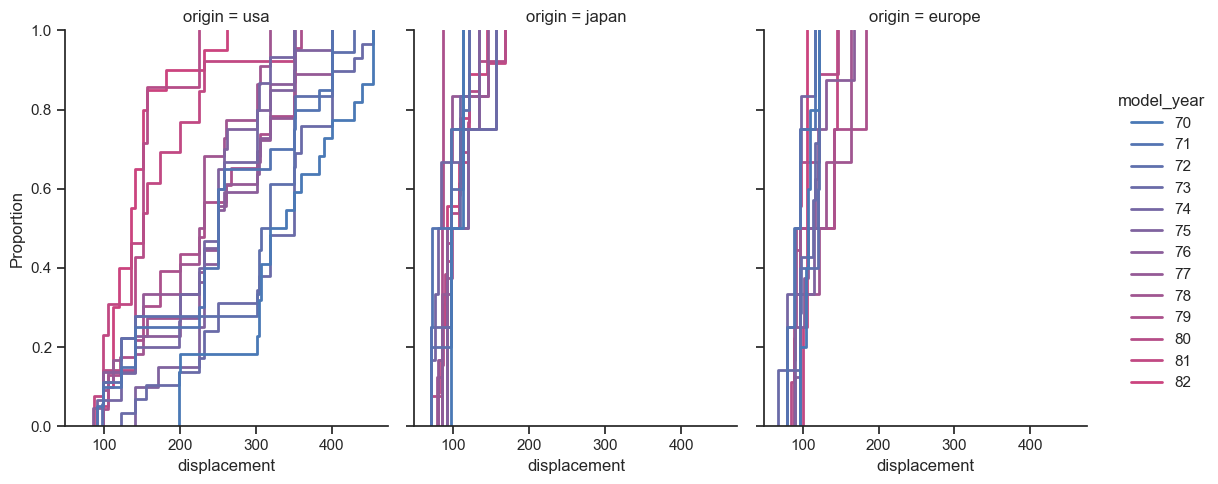

In [5]:
# 图表背景为白色，四周有刻度线（ticks），简洁且适合科学绘图。
sns.set_theme(style="ticks")
# 从 seaborn-data/mpg.csv 加载汽车数据集（MPG：Miles Per Gallon，每加仑燃油行驶英里数）。
# 返回一个 Pandas DataFrame，包含字段如 mpg（燃油效率）、displacement（发动机排量）、origin（产地）、model_year（车型年份）等。
mpg = pd.read_csv("seaborn-data/mpg.csv")
display(mpg.sample(10))

# colors：定义两个 HSL 颜色元组（Hue, Saturation, Lightness）：
#     (250, 70, 50)：蓝色调（Hue=250）。
#     (350, 70, 50)：粉红色调（Hue=350）。
colors = (250, 70, 50), (350, 70, 50)
# 混合这两个颜色生成渐变色板。
#     input="husl"：输入颜色格式为 HUSL（类似 HSL，但更均匀）。
#     as_cmap=True：返回一个 matplotlib 的 Colormap 对象，用于连续颜色映射。
# 用途：后续用此颜色映射区分不同 model_year（年份越近颜色越接近第二个颜色）。
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)

sns.displot(
    mpg,
    x="displacement",   # 分析发动机排量（displacement）的分布
    col="origin",       # 按 origin 列（产地）分面，生成多个子图（每列一个产地）。
    hue="model_year",   # 用颜色区分不同 model_year（车型年份）。颜色渐变由 cmap 定义（年份越近越粉红）。
    kind="ecdf",        # 绘制经验累积分布函数（ECDF），显示小于等于某排量的车辆比例。ECDF 是阶梯式曲线，直接反映数据分布（无需平滑）。
    aspect=.75,
    linewidth=2,
    palette=cmap,
)

### 图形解读
- **子图分面**：每列代表一个产地（如 `usa`、`japan`、`europe`），独立显示该产地的排量分布。
- **横轴**：发动机排量（`displacement`，单位可能是立方英寸或升）。
- **纵轴**：ECDF 值（0~1），表示排量 ≤ 当前值的车辆比例。
  - 例如，ECDF=0.5 时对应的排量是中位数。
- **颜色**：不同颜色的曲线代表不同年份的车型，颜色渐变反映时间顺序（如蓝色→粉红表示年份从早到晚）。
- **用途**：
  - 比较不同产地的排量分布差异（如美国车排量普遍较大）。
  - 观察同一产地内，随着年份推移，排量是否变化（曲线是否左右偏移）。

### 补充说明
- **ECDF 特点**：
  - 直接展示数据的分位数，无需分箱或平滑。
  - 适合比较多个组的分布差异。
- **颜色映射**：
  - 如果 `model_year` 是数值列，`hue` 会自动映射为连续变量，使用 `cmap` 的渐变。
  - 若 `model_year` 是分类变量（如字符串），需确保 `palette` 是离散色板。
- **分面控制**：
  - 可通过 `col_wrap` 参数限制每行子图数量（如 `col_wrap=2`）。
  - 添加 `facet_kws` 可调整子图间距等。

### 效果示意图（文字描述）
图形会生成多个子图（每列一个产地），每个子图中包含多条彩色 ECDF 曲线（每条代表一个年份）。例如：
- **美国（usa）**：
  - 曲线整体靠右（排量较大），早期年份（蓝色）排量更大，近年（粉红）略减小。
- **日本（japan）**：
  - 曲线靠左（排量较小），年份间变化可能不明显。

通过此图，可以直观分析不同产地汽车排量的分布及随时间的变化趋势。